##### Importing required packages

In [99]:
#%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.charts import Bar
from bokeh.io import output_notebook
from bokeh.models import Legend
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import f1_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

##### Importing Data

In [22]:
filename = '/Users/GodSpeed/Documents/CodeWork/HR_analytics/HR_comma_sep.csv'
data = pd.read_csv(filename)
data_orig = data
labels = data[['left']]
data = data.drop(['left'],1)
#data = preprocessing.scale(data)
#print max(data['satisfaction_level'])
data_orig.info()
data_orig.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The column sales and salary must be non-numerical as they haven't appeared in the description. Let's see the unique values in them.

In [4]:
unique_sales = data_orig['sales'].unique()
print "unique values in sales: ", unique_sales
unique_salary = data_orig['salary'].unique()
print "unique values in salary: ",unique_salary

unique values in sales:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
unique values in salary:  ['low' 'medium' 'high']


# Visualizing the data

In [5]:
output_notebook()

hist, edges = np.histogram(data['satisfaction_level'], density = False, bins = 'fd')
p1 = figure(title = "Distribution of Satisfaction Level", tools = "")
p1.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p1.legend.location = "top_left"
p1.xaxis.axis_label = 'Satisfaction Level'
p1.yaxis.axis_label = 'Number of Employees'


hist, edges = np.histogram(data['last_evaluation'], density = False, bins = 'fd')
p2 = figure(title = "Distribution of Last Evaluation", tools = "")
p2.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649")
p2.legend.location = "top_left"
p2.xaxis.axis_label = 'Last Evaluation'
p2.yaxis.axis_label = 'Number of Employees'


p3 = Bar(data['number_project'], 'number_project', 
        values = 'number_project', agg = 'count', 
        title = 'Distribution of Number of Projects', 
        legend = False, tools = '', color = '#4169E1')


hist, edges = np.histogram(data['average_montly_hours'], density = False, bins = 'fd')
p4 = figure(title = "Distribution of Average Monthly Hours", tools = "")
p4.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649")
p4.xaxis.axis_label = 'Average Monthly Hours'
p4.yaxis.axis_label = 'Number of Employees'


p5 = Bar(data['time_spend_company'], 'time_spend_company', 
        values = 'time_spend_company', agg = 'count', 
        title = 'Distribution of Time Spent in Company', 
        legend = False, tools = '', color = '#4169E1')


p6 = Bar(data['Work_accident'], 'Work_accident', values = 'Work_accident',
        agg = 'count', title = 'Distribution of Work Accidents', 
        legend = False, tools = '', color = '#4169E1')


p7 = Bar(data['promotion_last_5years'], 'promotion_last_5years', 
        values = 'promotion_last_5years', agg = 'count', 
        title = 'Distribution of Promotion in Last 5 years', 
        legend = False, tools = '', color = '#4169E1')

p8 = Bar(data['sales'], 'sales', values = 'sales', 
         agg = "count", title="Distribution of Job Domain", 
         legend = False, tools = "", color = '#4169E1')


p9 = Bar(data['salary'], 'salary', values = 'salary',
        agg = "count", title = 'Distribution of Salary', 
        legend = False, tools = '', color = '#4169E1')


p10 = Bar(labels, 'left', values = 'left',
        agg = "count", title = 'Distribution of People left', 
        legend = False, tools = '', color = '#4169E1')


show(gridplot(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, 
              ncols = 2, plot_width = 400, plot_height = 400))


Loading BokehJS ...

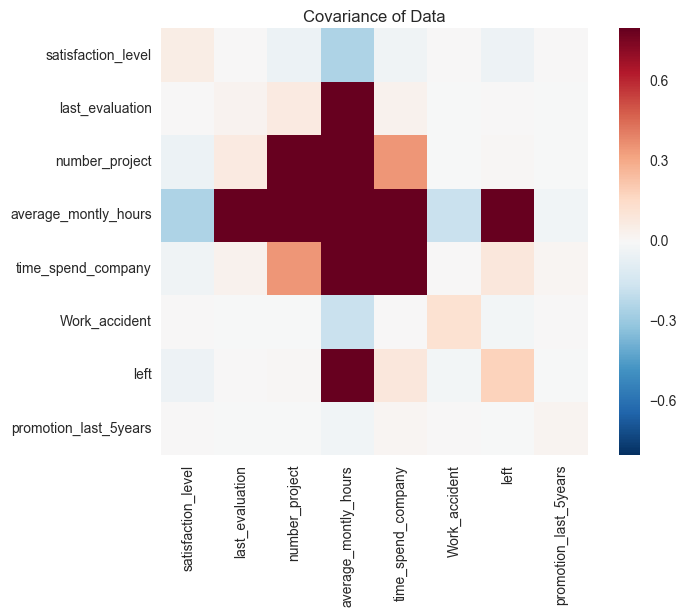

In [6]:
data_covariance = data_orig.cov()
sns.heatmap(data_covariance, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

The variables with high positive covariance are:
    * last_evaluation and average_monthly_hours
    * number_project and average_monthly_hours
    * time_spend_company and average_monthly_hours
    * left and average_monthly_hours
The variables with high negative covariance are:
    * satisfaction_level and average_monthly_hours

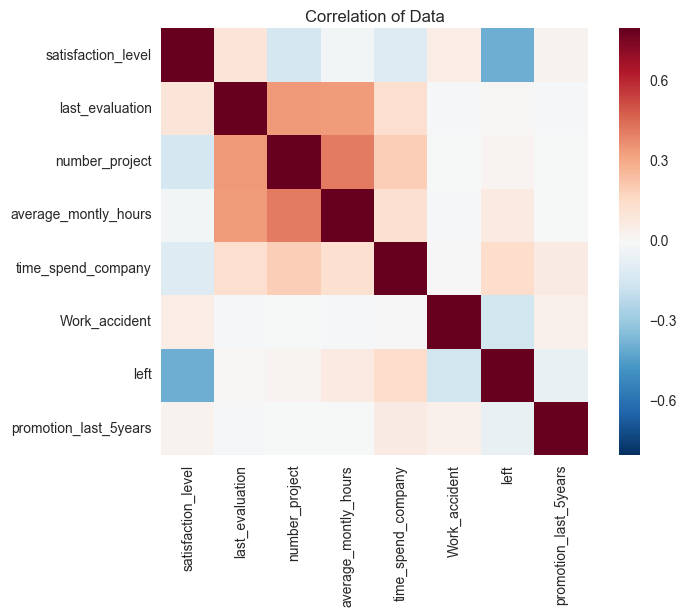

In [7]:
data_corr = data_orig.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

The variable _left_ is highly correlated with **satisfaction_level**.

Assigning numerical values to non-numerical columns _sales_ and _salary_.

In [23]:
sales_dict = {}
for i in range (len(unique_sales)):
    data_orig['sales'].replace(to_replace = unique_sales[i], 
                               value = i, inplace = True)
    sales_dict[unique_sales[i]] = i

salary_dict = {}
for i in range (len(unique_salary)):
    data_orig['salary'].replace(to_replace = unique_salary[i],
                              value = i, inplace = True)
    salary_dict[unique_salary[i]] = i
print sales_dict
print salary_dict

{'management': 5, 'product_mng': 7, 'hr': 2, 'marketing': 8, 'support': 4, 'sales': 0, 'RandD': 9, 'IT': 6, 'technical': 3, 'accounting': 1}
{'high': 2, 'medium': 1, 'low': 0}


# Visualizing probability densities

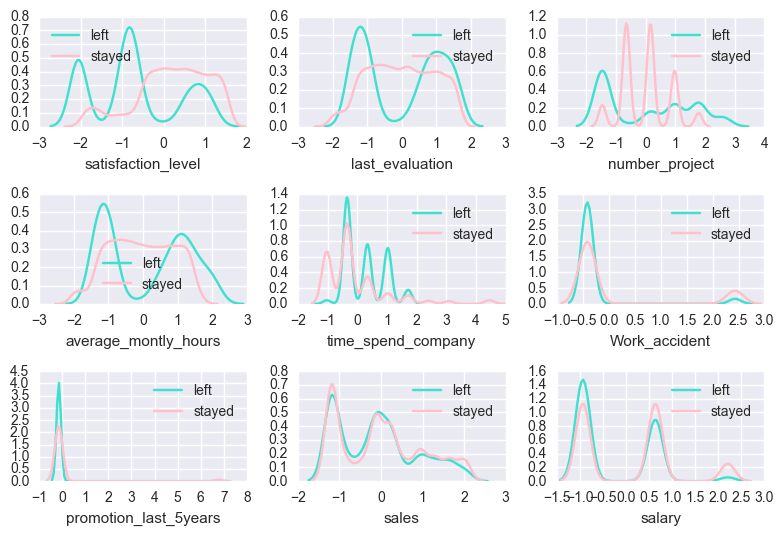

In [10]:
e_left = np.where(data_orig['left'] == 1)[0]
e_stay = np.where(data_orig['left'] == 0)[0]
cols = data_orig.drop(['left'],1).columns
i=331
plt.figure(1)
for col in cols:
    plt.subplot(i)
    X = preprocessing.scale(data_orig.loc[:, col])
    X = np.expand_dims(X, axis=1)
    X_left = X[e_left,:]
    X_stay = X[e_stay, :]
    
    sns.distplot(X_left, axlabel = col, hist = False, 
                 color = 'turquoise', label = 'left');
    sns.distplot(X_stay, axlabel = col, hist = False, 
                 color = 'pink', label = 'stayed');
    i=i+1
plt.tight_layout()
plt.show()

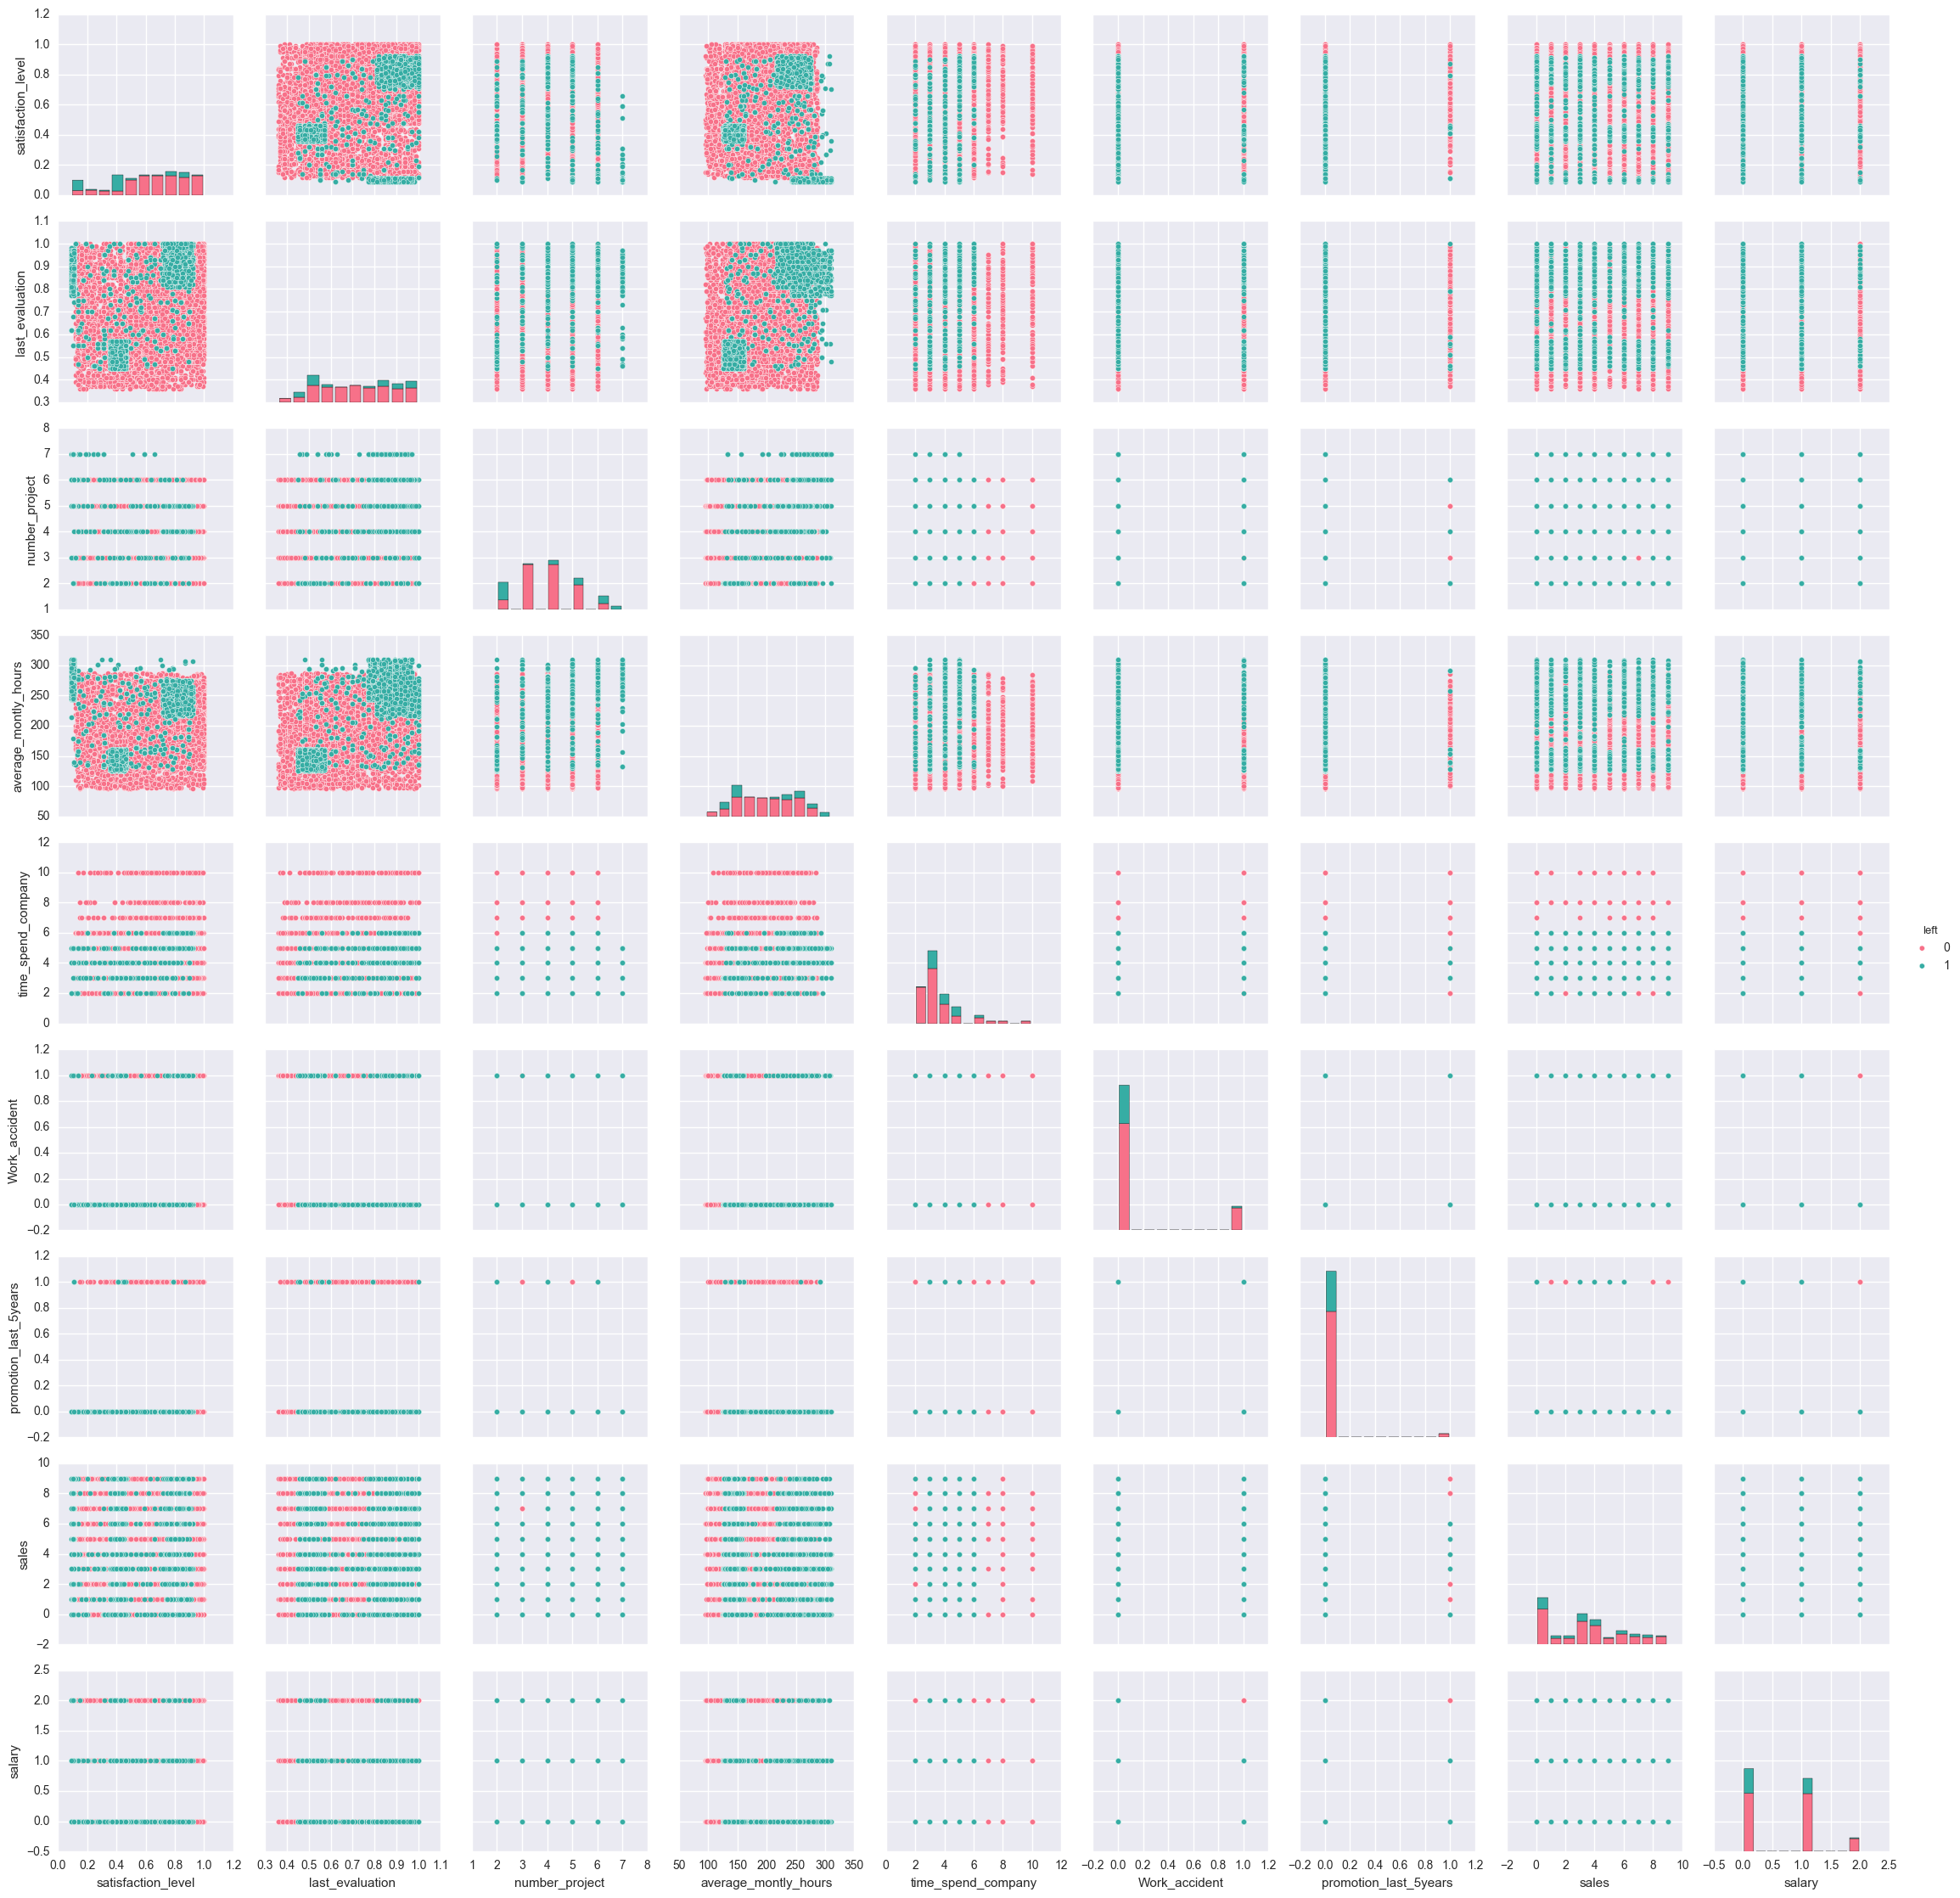

In [11]:
sns.set(color_codes=True)
var = list(data_orig.columns)
var.remove('left')
sns.pairplot(data_orig, hue='left', vars = var, palette="husl")
plt.show()

1. People with __satisfaction level__ from 0.7 to 0.9 with:
    * __last evaluation__ 0.8 or above, or
    * __average monthly hours__ 220 to 280
 have a high tendency to __leave__.
2. People with __satisfaction level__ 0.3 to 0.5 with:
    * __last evaluation__ 0.45 to 0.55, or
    * __average monhtly hours__ 140 to 160
 have a high tendency to __leave__ the job.
3. Sales doesn't play any major role in a person leaving the company.
4. Most of the people who have __left__ have __not been promoted__ in last 5 years.
5. People __spending more than 6 hours__ have a very high chances of __staying__ in the job, irrespective of any other factor.
6. Most of the people leaving the company are either satisified at a level of just 0.1 or 0.4.
7. People with a __low to medium salary__ have a higher tendency than those having high salary, to __leave__ the company, __unless they are satisfied to a level of about 1__ or their __last evaluation is less than 0.45__.
8. People with __last evaluation less than or equal to 0.4__ have a very high chance of __staying__ in the job, irrespective of any other factor.
9. People with __last evaluation above 0.75 and average monthly hours above 220__ have a very high chance of __leaving__.
10. Number of projects doesn't play any major role in determining whether a person would leave or not.
11. Work Accidents doesn't play any major role in determining whether a person would leave the company or not.
12. People with __less than 7 hours__ and __more than 125 average monthly hours__ have a high tendency to __leave__ the job.

# Classification using KNN, Naive Bayes, Decision Trees, and Random Forest

## using all features

In [24]:
Y = np.array(data_orig[['left']])
X = np.array(data_orig.drop(['left'],1))
X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

clfs = [KNeighborsClassifier(n_neighbors = 1), 
      GaussianNB(),
      DecisionTreeClassifier(splitter = 'random'),
       RandomForestClassifier()]
clfName = {1:'KNN', 2:'Naive Bayes', 3:'Decision Trees', 4:'Random Forests'}

for i in range(len(clfs)):
    scores = cross_val_score(clfs[i], X_train, Y_train.ravel(), cv=5, scoring = 'f1')
    print "mean validation F1 for",clfName[i+1], ":", "Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)
    clf = clfs[i].fit(X_train, Y_train.ravel())
    Y_pred = clf.predict(X_test)
    f1 = f1_score(Y_test, Y_pred)
    print 'Test F1 for',clfName[i+1], ":", f1

mean validation F1 for KNN : Accuracy: 0.94 (+/- 0.00)
Test F1 for KNN : 0.932157394844
mean validation F1 for Naive Bayes : Accuracy: 0.64 (+/- 0.02)
Test F1 for Naive Bayes : 0.630086313194
mean validation F1 for Decision Trees : Accuracy: 0.94 (+/- 0.02)
Test F1 for Decision Trees : 0.941496598639
mean validation F1 for Random Forests : Accuracy: 0.98 (+/- 0.01)
Test F1 for Random Forests : 0.974647887324


# Learning Curve

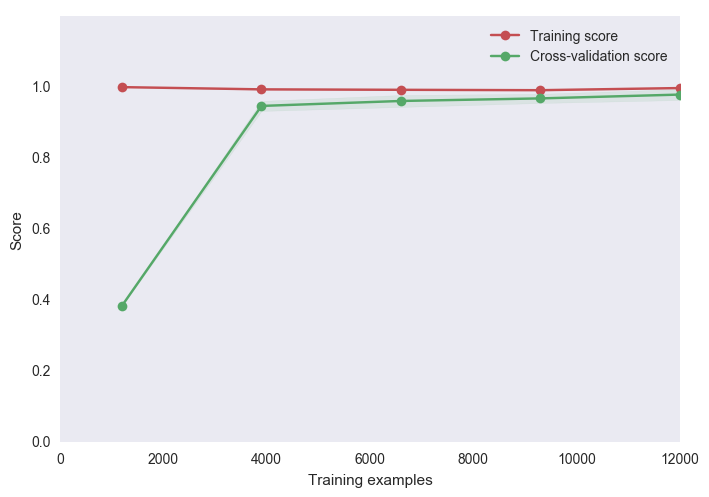

In [25]:
clf = RandomForestClassifier()
plt.figure()
plt.ylim(0,1.2)
plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, Y.ravel(), cv=5, n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5),
    scoring = 'f1')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

We can see from the learning curve that increasing the number of samples may not help much in improving the performance.

# Error Analysis

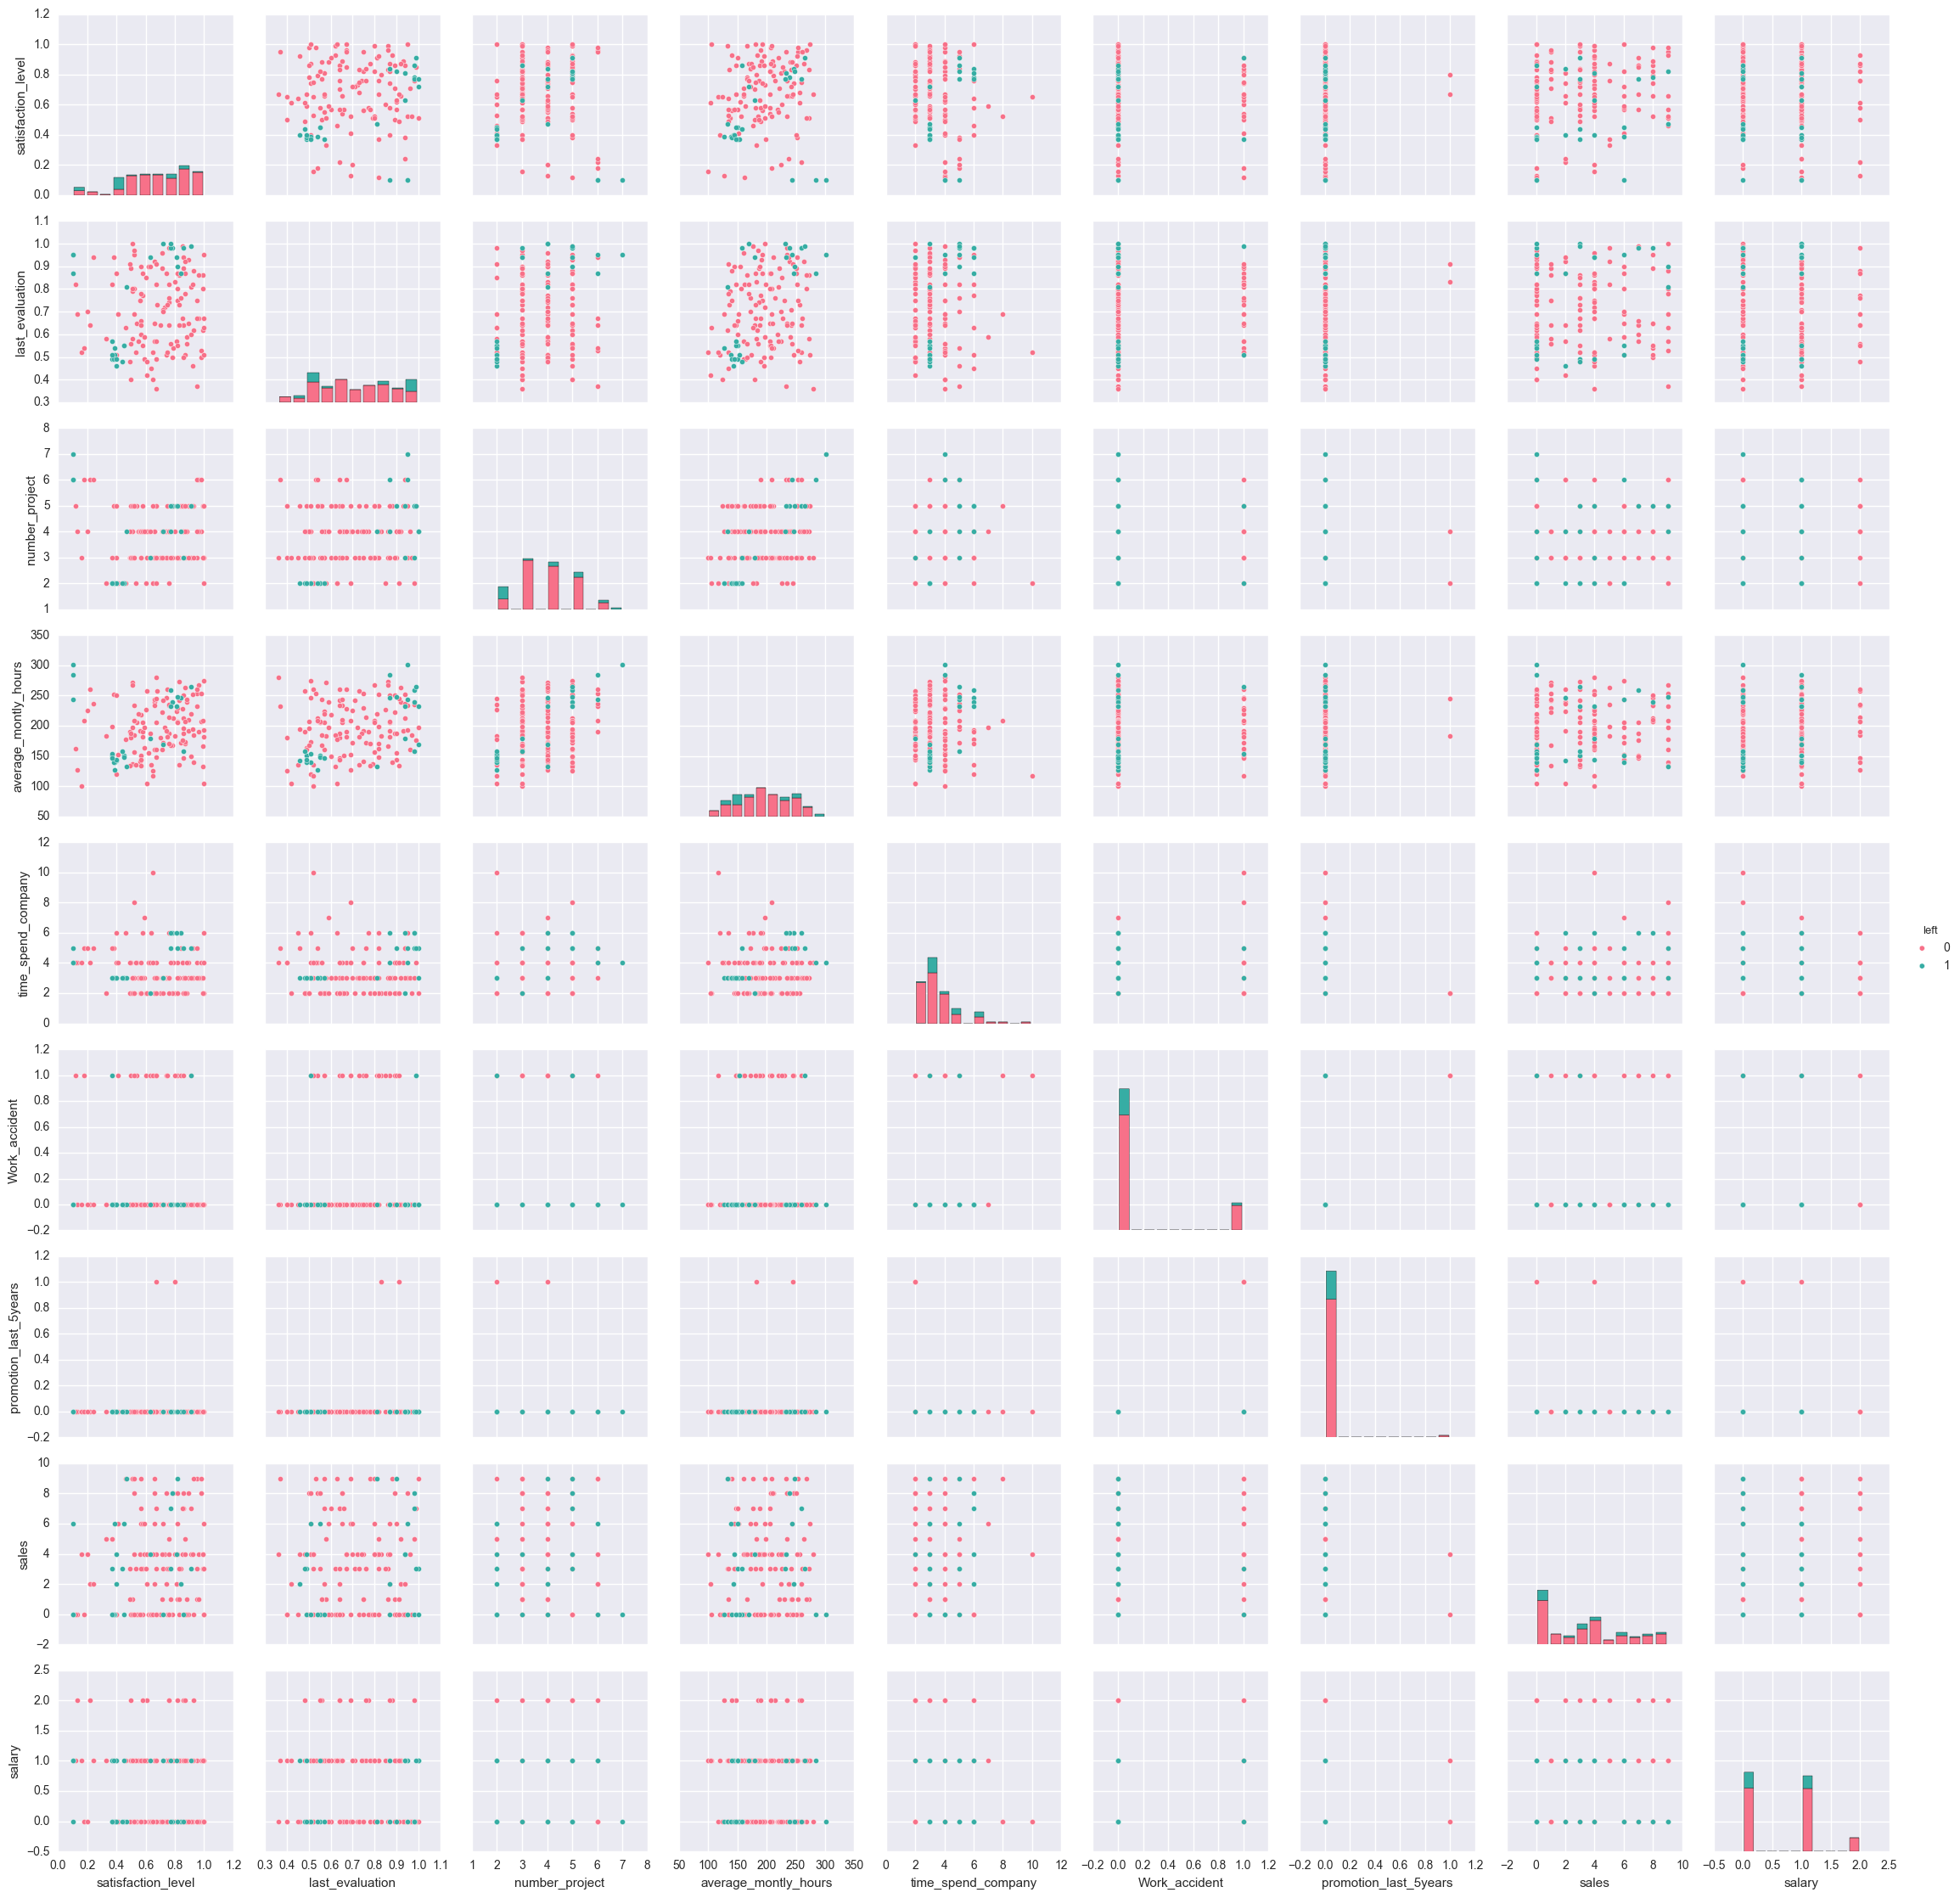

In [14]:
Ypred = []
kf = KFold(n_splits = 5)
clf = RandomForestClassifier()
for train_index, test_index in kf.split(X_train):
    Xtr, Xval = X_train[train_index], X_train[test_index]
    Ytr, Yval = Y_train[train_index], Y_train[test_index]
    fit_clf = clf.fit(Xtr, Ytr)
    Ypred.extend(fit_clf.predict(Xval))

Ypred = np.array(Ypred)
Ypred = np.expand_dims(Ypred, axis=1)
wrong_pred = np.where(np.not_equal(Ypred,Y_train))[0]
wrong_pred_data = data_orig.iloc[wrong_pred, :]

sns.set(color_codes=True)
var = list(wrong_pred_data.columns)
var.remove('left')
sns.pairplot(wrong_pred_data, hue='left', vars = var, palette="husl")
plt.show()

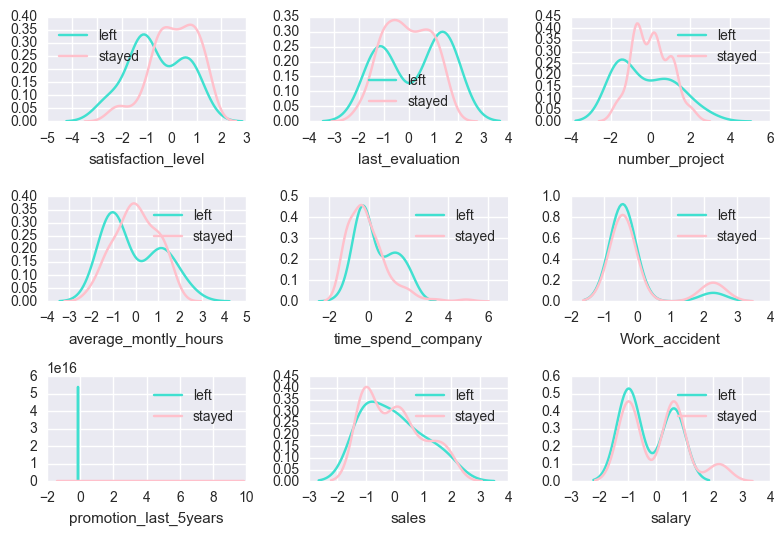

In [26]:
e_left = np.where(wrong_pred_data['left'] == 1)[0]
e_stay = np.where(wrong_pred_data['left'] == 0)[0]
cols = wrong_pred_data.drop(['left'],1).columns
i=331
plt.figure(1)
for col in cols:
    plt.subplot(i)
    X = preprocessing.scale(wrong_pred_data.loc[:, col])
    X = np.expand_dims(X, axis=1)
    X_left = X[e_left,:]
    X_stay = X[e_stay, :]
    
    sns.distplot(X_left, axlabel = col, hist = False, 
                 color = 'turquoise', label = 'left');
    sns.distplot(X_stay, axlabel = col, hist = False, 
                 color = 'pink', label = 'stayed');
    i=i+1
plt.tight_layout()
plt.show()

# Feature Engineering

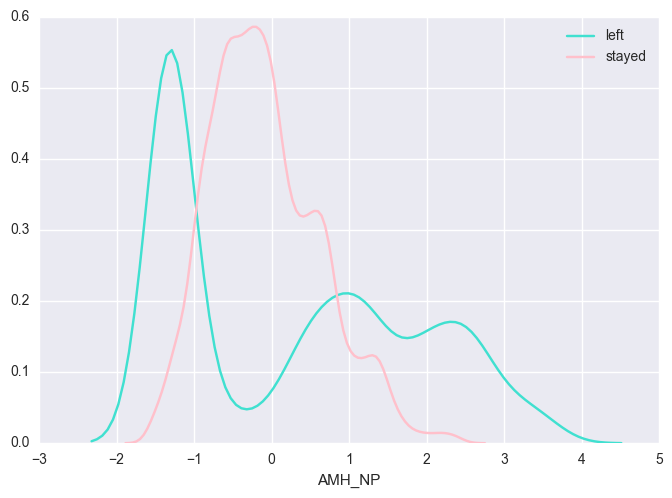

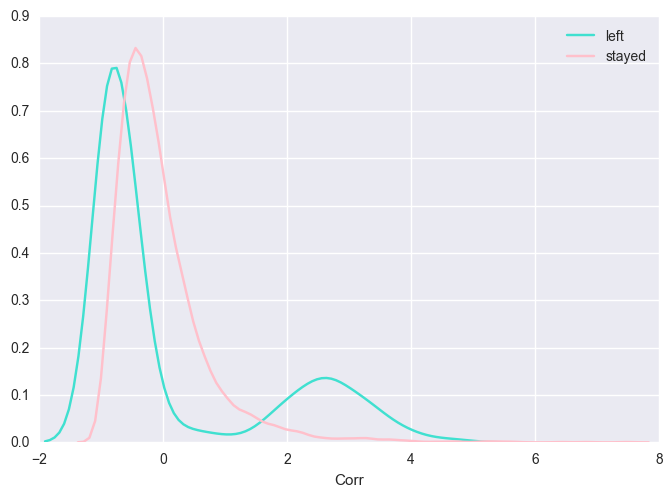

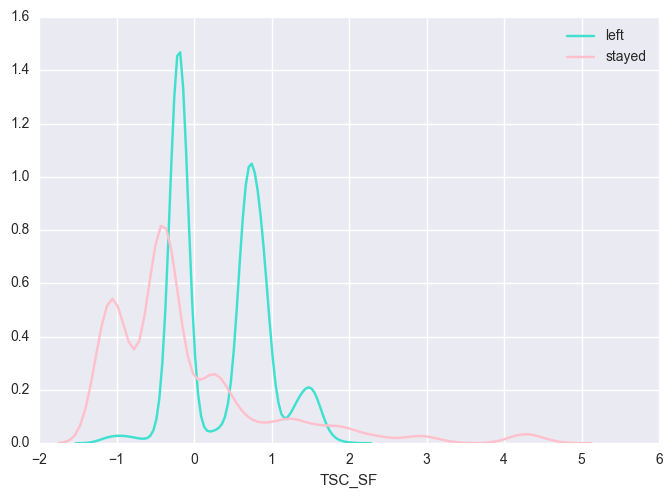

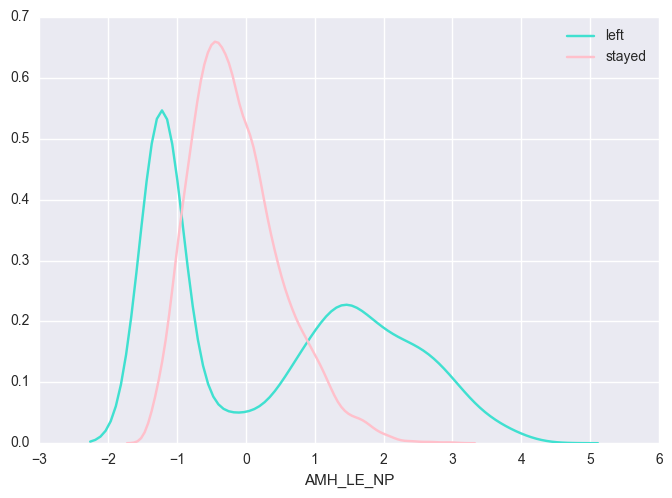

In [98]:
"""Average monthly hours and Number of projects help in separability in incorrect values but not in original data.
So we try to combine the two"""
data_FE = data_orig
e_left = np.where(data_FE['left'] == 1)[0]
e_stay = np.where(data_FE['left'] == 0)[0]
data_FE['AMH_NP'] = data_FE['average_montly_hours']*data_FE['number_project']
X = preprocessing.scale(data_FE['AMH_NP'])
X = np.expand_dims(X, axis=1)
X_left = X[e_left,:]
X_stay = X[e_stay, :]
    
sns.distplot(X_left, axlabel = 'AMH_NP', hist = False, 
             color = 'turquoise', label = 'left');
sns.distplot(X_stay, axlabel = 'AMH_NP', hist = False, 
             color = 'pink', label = 'stayed');
plt.show()

"""We combine the features having high covariance and the features 
having high correlation with the dependent variable."""

data_FE['Corr'] = data_orig['satisfaction_level']*data_orig['average_montly_hours']
data_FE['Corr'] = data_orig['last_evaluation']*data_FE['Corr']
data_FE['Corr'] = data_orig['time_spend_company']*data_FE['Corr']
data_FE['Corr'] = data_orig['number_project']*data_FE['Corr']

X = preprocessing.scale(data_FE['Corr'])
X = np.expand_dims(X, axis=1)
X_left = X[e_left,:]
X_stay = X[e_stay, :]
    
sns.distplot(X_left, axlabel = 'Corr', hist = False, 
             color = 'turquoise', label = 'left');
sns.distplot(X_stay, axlabel = 'Corr', hist = False, 
             color = 'pink', label = 'stayed');
plt.show()


data_FE['TSC_SF'] = abs(data_orig['time_spend_company'] - data_orig['satisfaction_level']) 
X = preprocessing.scale(data_FE['TSC_SF'])
X = np.expand_dims(X, axis=1)
X_left = X[e_left,:]
X_stay = X[e_stay, :]
    
sns.distplot(X_left, axlabel = 'TSC_SF', hist = False, 
             color = 'turquoise', label = 'left');
sns.distplot(X_stay, axlabel = 'TSC_SF', hist = False, 
             color = 'pink', label = 'stayed');
plt.show()


data_FE['AMH_LE_NP'] = (data_orig['average_montly_hours'] * data_orig['last_evaluation'] 
                     * data_orig['number_project'])
X = preprocessing.scale(data_FE['AMH_LE_NP'])
X = np.expand_dims(X, axis=1)
X_left = X[e_left,:]
X_stay = X[e_stay, :]
    
sns.distplot(X_left, axlabel = 'AMH_LE_NP', hist = False, 
             color = 'turquoise', label = 'left');
sns.distplot(X_stay, axlabel = 'AMH_LE_NP', hist = False, 
             color = 'pink', label = 'stayed');
plt.show()

## Feature Importance

In [81]:
clf = RandomForestClassifier()

Y = np.array(data_FE[['left']])
X = np.array(data_FE.drop(['left'],1))
#X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
clf = clf.fit(X_train, Y_train.ravel())

cols = data_FE.drop(['left'],1).columns
feature_importance_all = clf.feature_importances_
feature_importance = {}
for i in  range(len(cols)):
    feature_importance[cols[i]] = feature_importance_all[i]

feature_import =  pd.DataFrame.from_dict(feature_importance, 
                                         orient = 'index')
print feature_import.sort(columns = 0, ascending = False)

                              0
TSC_SF                 0.260389
AMH_LE_NP              0.143643
AMH_NP                 0.128152
satisfaction_level     0.096656
Corr                   0.074044
SF_LE                  0.068599
last_evaluation        0.067724
time_spend_company     0.057032
average_montly_hours   0.044978
number_project         0.041255
sales                  0.006545
Work_accident          0.005548
salary                 0.004994
promotion_last_5years  0.000441


## Feature selection
We remove the features which we saw not having any major role and check the results.

In [97]:
Y = np.array(data_FE[['left']])
X = np.array(data_FE[['Corr', 'AMH_NP', 'satisfaction_level', 'AMH_LE_NP', 'TSC_SF']])
#X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

clf = RandomForestClassifier()

scores = cross_val_score(clf, X_train, Y_train.ravel(), cv=5, scoring = 'f1')
print "mean validation F1 for Random Forests:", "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)
clf = clf.fit(X_train, Y_train.ravel())
Y_pred = clf.predict(X_test)
f1 = f1_score(Y_test, Y_pred)
print 'Test F1 for Random Forests :', f1

mean validation F1 for Random Forests: 0.97 (+/- 0.01)
Test F1 for Random Forests : 0.974656046343


The results above show us that after removing the features we saw earlier to not have any major role, we are getting almost same accuracy for Random Forest.